In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
sys.path.insert(0, '../')

from dynanets import datasets

## The $G(n,m)$ model

Implementation of the Dynamic $G(n,m)$ graph:   
At each time slot $t$ of the simulation, a (new) graph $G(t)$ is selected
according to the well-known random graph model $G(n,m)$ where $n$ is the number of nodes and $m$ is the
number of edges.

In [3]:
np.random.seed(42)

for i, frame in enumerate(datasets.dynamic_gnm(100, 5)):
    print frame.tolist()
    if i >= 2:
        break

[[51, 92], [14, 71], [60, 20], [82, 86], [87, 99]]
[[23, 2], [21, 52], [1, 87], [29, 37], [1, 63]]
[[59, 20], [32, 75], [57, 21], [88, 48], [90, 58]]


## The $G(n,p)$ model

Implementation of the Dynamic $G(n,p)$ graph:   
At each time slot $t$ of the simulation, a (new) graph $G(t)$ is selected
according to the well-known random graph model $G(n,p)$ where $n$ is the number of nodes and $p$ is the
edge probability.

In [4]:
np.random.seed(42)

for i, frame in enumerate(datasets.dynamic_gnp(10, 0.1)):
    print frame.tolist()
    if i >= 2:
        break

[[0, 6], [2, 9], [3, 7], [5, 6], [5, 8], [6, 8]]
[[0, 9], [2, 8], [4, 5], [4, 8], [6, 8]]
[[0, 1], [0, 5], [0, 8], [3, 7], [5, 9]]


##     Edge-Markovian Dynamic Graph

Implementation of the edge-Markovian dynamic graph as discussed in the following paper:
    
    Andrea E.F. Clementi, Claudio Macci, Angelo Monti, Francesco Pasquale, and Riccardo Silvestri. 2008. 
    Flooding time in edge-Markovian dynamic graphs. In Proceedings of the 
    twenty-seventh ACM symposium on Principles of distributed computing (PODC '08). 
    ACM, New York, NY, USA, 213-222.

Starting from an arbitrary initial edge probability distribution,
at every time step, every edge changes its state (existing or not)
according to a two-state Markovian process with 
probabilities $p$ (edge birth-rate) and $q$ (edge death-rate).
If an edge exists at time $t$ then, at time $t + 1$, it dies with probability $q$.
If instead the edge does not exist at time $t$, then 
it will come into existence at time $t + 1$ with probability $p$. 

Required arguments:

  - *n*:
    The number of vertices in the graph.
    
  - *p*:
    If the edge does not exist at time t then it will come into existence at time
    t + 1 with probability p.

  - *q*:
    If an edge exists at time t then, at time t + 1, it dies with probability q.

  - *g*::
    an arbitrary initial probability distribution over the set [n] yielding E0.

In [5]:
np.random.seed(42)

for i, frame in enumerate(datasets.edge_markovian(10, 0.1, 0.5)):
    print frame.tolist()
    if i >= 2:
        break

[[0, 9], [2, 8], [4, 5], [4, 8], [6, 8]]
[[0, 1], [0, 5], [0, 8], [2, 8], [3, 7], [4, 5], [4, 8], [5, 9]]
[[0, 1], [0, 5], [0, 8], [1, 2], [3, 4], [3, 5], [3, 7], [3, 9], [4, 5], [4, 7], [5, 6], [5, 9], [6, 9]]


## Continuous Edge-Markovian Dynamic Graph

Implementation of the continuous-time edge-Markovian dynamic graph as discussed in the following paper:

    Augustin Chaintreau, Abderrahmen Mtibaa, Laurent Massoulie, and Christophe Diot. 2007. 
    The diameter of opportunistic mobile networks. In Proceedings of the 
    2007 ACM CoNEXT conference (CoNEXT '07). ACM, New York, NY, USA, , Article 12 , 12 pages.

We assume that, for any pairs of nodes $(u, v)$, the times of
contact are separated by exponential random variables.

Required arguments:

  - *n*:
    The number of vertices in the graph.
    
  - *lmbd*:
    The scale (mean) of the exponential distribution.

In [6]:
np.random.seed(42)

for i, frame in enumerate(datasets.continuous_time_edge_markovian(10, lmbd=2)):
    print frame.tolist()
    if i >= 2:
        break

[[0, 1], [0, 2], [0, 7], [0, 9], [1, 2], [2, 5], [3, 4], [3, 5], [3, 8], [4, 5], [6, 7], [6, 9]]
[[0, 2], [0, 3], [0, 8], [1, 7], [1, 8], [2, 4], [2, 5], [2, 7], [2, 8], [3, 8], [3, 9], [4, 5], [4, 7], [4, 8], [6, 7], [8, 9]]
[[0, 2], [0, 8], [0, 9], [1, 6], [1, 9], [2, 3], [2, 8], [3, 6], [4, 6], [5, 9], [6, 7], [7, 8]]


## Broad Continuous Edge-Markovian Dynamic Graph

This model is similar to the continuous-time edge-Markovian dynamic graph as discussed in the following paper:

    Augustin Chaintreau, Abderrahmen Mtibaa, Laurent Massoulie, and Christophe Diot. 2007. 
    The diameter of opportunistic mobile networks. In Proceedings of the 
    2007 ACM CoNEXT conference (CoNEXT '07). ACM, New York, NY, USA, , Article 12 , 12 pages.

The difference is in the generated inter-contact times.    
We assume that, for any pairs of nodes $(u, v)$, the times of
contact are separated by random variables from a power-law distribution.

Required arguments:

  - *n*:
    The number of vertices in the graph.
    
  - *alpha*:
    The alpha exponent of the power-law distribution.

In [7]:
np.random.seed(42)

for i, frame in enumerate(datasets.broad_continuous_time_edge_markovian(10, alpha=-1.5)):
    print frame.tolist()
    if i >= 2:
        break

[]
[[0, 5], [0, 8], [0, 9], [1, 7], [2, 3], [2, 4], [2, 8], [4, 5], [4, 8], [4, 9], [5, 8], [6, 7], [6, 8], [7, 9], [8, 9]]
[[0, 2], [0, 6], [2, 5], [3, 5], [3, 8]]


# SocioPatterns datasets

## The SocioPatterns School dataset

Loads the SocioPatterns School data.   
The data were collected by the SocioPatterns collaboration using wearable proximity sensors that
sense the face-to-face proximity relations of individuals wearing them.

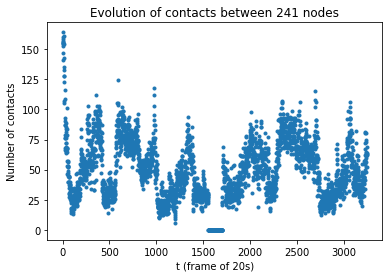

In [8]:
count = []

spschool = datasets.load_spschool()

for frame in spschool:
    count.append(len(frame))

plt.plot(count, '.')
plt.ylabel('Number of contacts')
plt.xlabel('t (frame of 20s)')
plt.title('Evolution of contacts between %s nodes'%spschool.nr_nodes);

## The SocioPatterns HyperText 2009 dataset

Loads the SocioPatterns data collected during the HyperText 2009 conference.   
The data were collected by the SocioPatterns collaboration using wearable proximity sensors that
sense the face-to-face proximity relations of individuals wearing them.

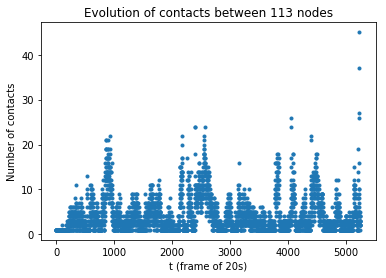

In [9]:
count = []

ht2009 = datasets.fetch_HT2009()

for frame in ht2009:
    count.append(len(frame))

plt.plot(count, '.')
plt.ylabel('Number of contacts')
plt.xlabel('t (frame of 20s)')
plt.title('Evolution of contacts between %s nodes'%ht2009.nr_nodes);